# Exploratory Data Analysis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("/content/Grammar Correction.csv")

In [3]:
df.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Serial Number            2018 non-null   int64 
 1   Error Type               2018 non-null   object
 2   Ungrammatical Statement  2018 non-null   object
 3   Standard English         2018 non-null   object
dtypes: int64(1), object(3)
memory usage: 63.2+ KB


In [5]:
df.shape

(2018, 4)

In [34]:
duplicates = df[df.duplicated(keep=False)]
duplicates.sum()

Serial Number              0
Error Type                 0
Ungrammatical Statement    0
Standard English           0
dtype: object

In [7]:
df.isna().sum()

Serial Number              0
Error Type                 0
Ungrammatical Statement    0
Standard English           0
dtype: int64

In [14]:
df["Error Type"].value_counts()

Error Type
Sentence Structure Errors                         103
Verb Tense Errors                                 100
Subject-Verb Agreement                            100
Article Usage                                     100
Spelling Mistakes                                 100
Preposition Usage                                  95
Punctuation Errors                                 60
Relative Clause Errors                             51
Gerund and Participle Errors                       50
Abbreviation Errors                                50
Slang, Jargon, and Colloquialisms                  50
Negation Errors                                    50
Incorrect Auxiliaries                              50
Ambiguity                                          50
Tautology                                          50
Lack of Parallelism in Lists or Series             50
Mixed Metaphors/Idioms                             50
Parallelism Errors                                 49
Contractions Erro

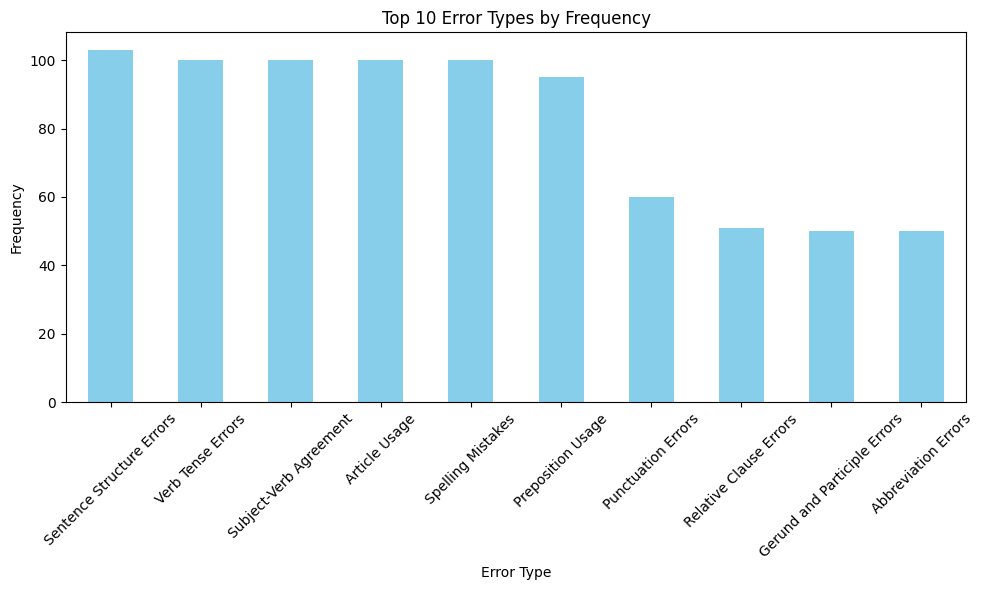

In [13]:
error_counts = df["Error Type"].value_counts().head(10)
# Plot the bar chart
plt.figure(figsize=(10, 6))
error_counts.plot(kind="bar", color="skyblue")
plt.title("Top 10 Error Types by Frequency")
plt.xlabel("Error Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

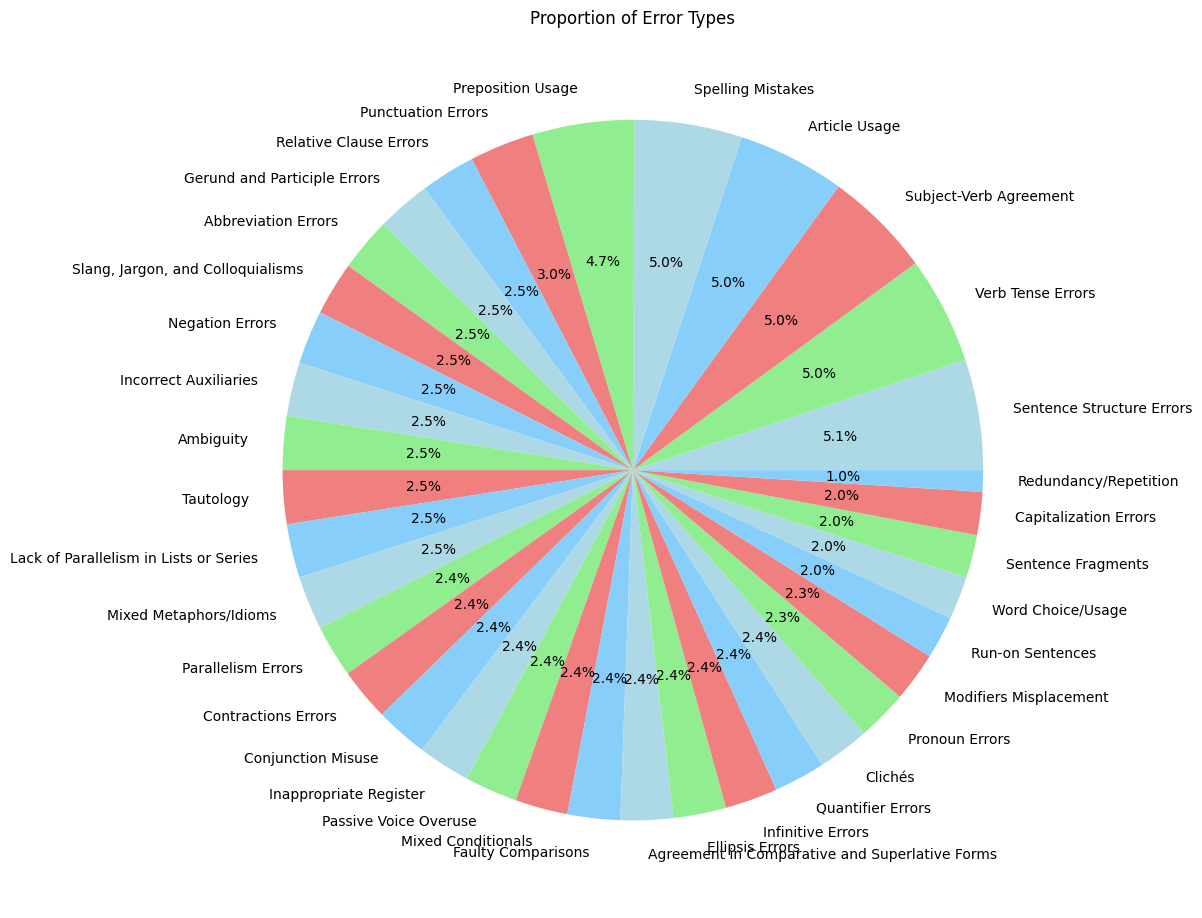

In [32]:
error_counts = df["Error Type"].value_counts()
# Plot the pie chart
plt.figure(figsize=(12, 12))
error_counts.plot(kind="pie", autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title("Proportion of Error Types")
plt.ylabel("")
plt.tight_layout()
plt.show()

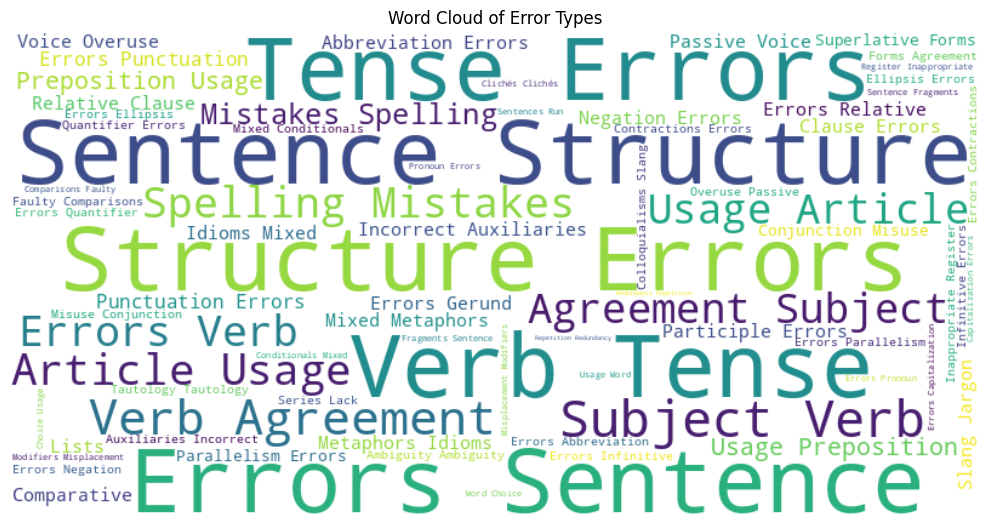

In [26]:
# Generate text for the word cloud
text = ' '.join(df['Error Type'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Error Types")
plt.axis("off")
plt.tight_layout()
plt.show()


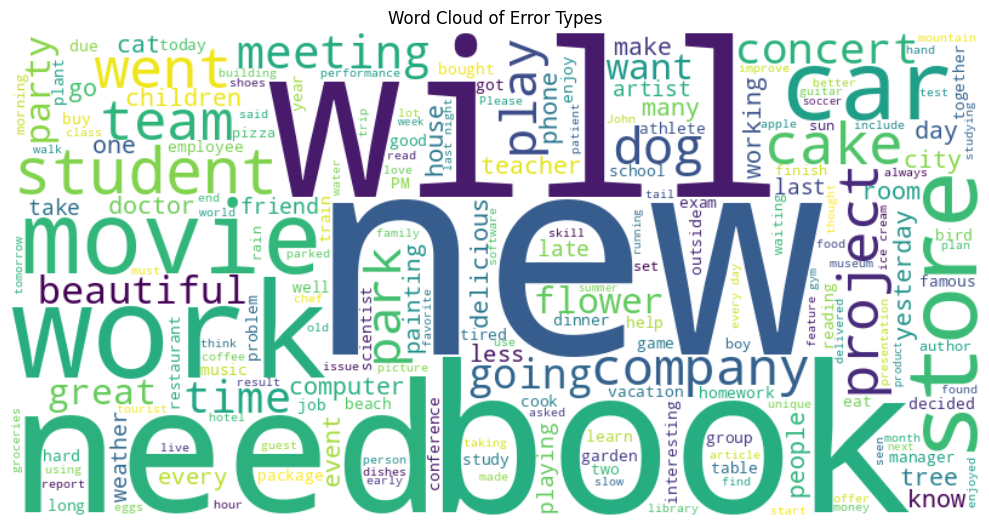

In [27]:
# Generate text for the word cloud
text = ' '.join(df['Ungrammatical Statement'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Ungrammatical Statement")
plt.axis("off")
plt.tight_layout()
plt.show()


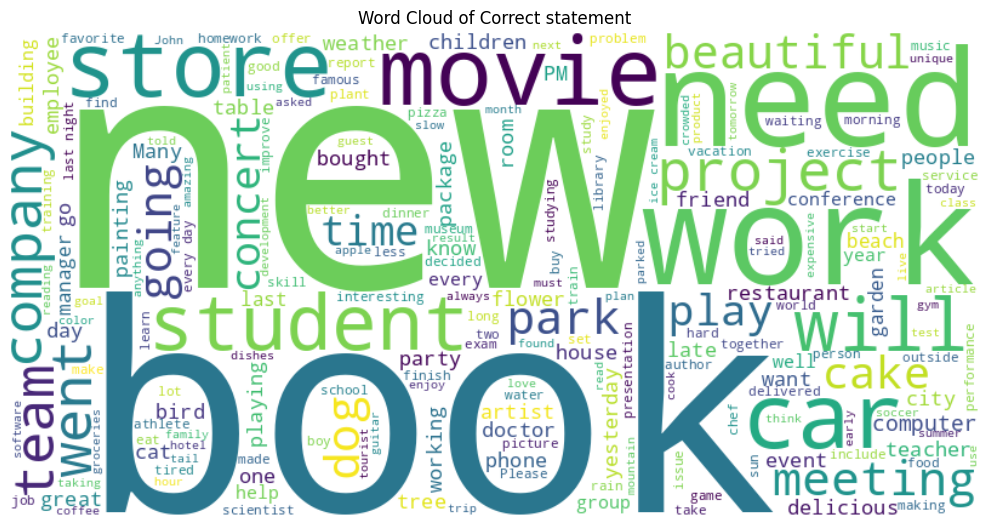

In [29]:
# Generate text for the word cloud
text = ' '.join(df['Standard English'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Correct statement")
plt.axis("off")
plt.tight_layout()
plt.show()


# Model Fine Tuning - BERT

In [ ]:
import torch
from transformers import BertTokenizer, BertForMaskedLM
from torch.utils.data import DataLoader, TensorDataset, random_split
from tqdm import tqdm
import pandas as pd

In [ ]:
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMaskedLM.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Load data from CSV file
data = pd.read_csv('/content/Grammar Correction.csv')
# Extract erroneous and corrected sentences
erroneous_sentences = data['Ungrammatical Statement'].tolist()
corrected_sentences = data['Standard English'].tolist()

In [ ]:
# Function to pad sequences to the same length
def pad_sequences(sequences, max_length, pad_value=0):
    padded_sequences = []
    for seq in sequences:
        if len(seq) < max_length:
            padded_seq = seq + [pad_value] * (max_length - len(seq))
        else:
            padded_seq = seq[:max_length]
        padded_sequences.append(padded_seq)
    return padded_sequences

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Tokenize input sentences and prepare input tensors
tokenized_inputs = tokenizer(erroneous_sentences, return_tensors='pt', padding=True, truncation=True)
labels = tokenizer(corrected_sentences, return_tensors='pt', padding=True, truncation=True)

# Convert token IDs to tensors
input_ids = tokenized_inputs['input_ids']
attention_mask = tokenized_inputs['attention_mask']
labels_ids = labels['input_ids']

# Pad sequences to the same length
max_length = max(len(seq) for seq in input_ids)
input_ids = pad_sequences(input_ids.tolist(), max_length)
attention_mask = pad_sequences(attention_mask.tolist(), max_length)
labels_ids = pad_sequences(labels_ids.tolist(), max_length)

# Convert padded sequences to tensors
input_ids = torch.tensor(input_ids).to(device)
attention_mask = torch.tensor(attention_mask).to(device)
labels_ids = torch.tensor(labels_ids).to(device)

In [ ]:
# Prepare DataLoader
dataset = TensorDataset(input_ids, attention_mask, labels_ids)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [ ]:
# Fine-tune BERT model
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss()
model.to(device)
for epoch in range(30):
    model.train()
    total_loss = 0

    for batch in tqdm(train_dataloader, desc=f'Epoch {epoch + 1}'):
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)  # Move tensors to GPU
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1}, Loss: {total_loss:.4f}')


Epoch 1: 100%|██████████| 100/100 [00:13<00:00,  7.54it/s]


Epoch 1, Loss: 242.8673


Epoch 2: 100%|██████████| 100/100 [00:13<00:00,  7.39it/s]


Epoch 2, Loss: 77.5569


Epoch 3: 100%|██████████| 100/100 [00:13<00:00,  7.39it/s]


Epoch 3, Loss: 57.1861


Epoch 4: 100%|██████████| 100/100 [00:13<00:00,  7.52it/s]


Epoch 4, Loss: 43.2066


Epoch 5: 100%|██████████| 100/100 [00:13<00:00,  7.60it/s]


Epoch 5, Loss: 32.0104


Epoch 6: 100%|██████████| 100/100 [00:13<00:00,  7.35it/s]


Epoch 6, Loss: 23.9734


Epoch 7: 100%|██████████| 100/100 [00:13<00:00,  7.55it/s]


Epoch 7, Loss: 18.1475


Epoch 8: 100%|██████████| 100/100 [00:13<00:00,  7.49it/s]


Epoch 8, Loss: 13.4467


Epoch 9: 100%|██████████| 100/100 [00:13<00:00,  7.47it/s]


Epoch 9, Loss: 9.8241


Epoch 10: 100%|██████████| 100/100 [00:13<00:00,  7.50it/s]


Epoch 10, Loss: 7.2337


Epoch 11: 100%|██████████| 100/100 [00:13<00:00,  7.52it/s]


Epoch 11, Loss: 5.4784


Epoch 12: 100%|██████████| 100/100 [00:13<00:00,  7.54it/s]


Epoch 12, Loss: 4.2750


Epoch 13: 100%|██████████| 100/100 [00:13<00:00,  7.53it/s]


Epoch 13, Loss: 3.2341


Epoch 14: 100%|██████████| 100/100 [00:13<00:00,  7.54it/s]


Epoch 14, Loss: 2.8205


Epoch 15: 100%|██████████| 100/100 [00:13<00:00,  7.52it/s]


Epoch 15, Loss: 2.2626


Epoch 16: 100%|██████████| 100/100 [00:13<00:00,  7.51it/s]


Epoch 16, Loss: 2.3443


Epoch 17: 100%|██████████| 100/100 [00:13<00:00,  7.51it/s]


Epoch 17, Loss: 1.9071


Epoch 18: 100%|██████████| 100/100 [00:13<00:00,  7.51it/s]


Epoch 18, Loss: 1.7390


Epoch 19: 100%|██████████| 100/100 [00:13<00:00,  7.51it/s]


Epoch 19, Loss: 1.5758


Epoch 20: 100%|██████████| 100/100 [00:13<00:00,  7.52it/s]


Epoch 20, Loss: 1.6657


Epoch 21: 100%|██████████| 100/100 [00:13<00:00,  7.52it/s]


Epoch 21, Loss: 1.4523


Epoch 22: 100%|██████████| 100/100 [00:13<00:00,  7.50it/s]


Epoch 22, Loss: 1.4952


Epoch 23: 100%|██████████| 100/100 [00:13<00:00,  7.52it/s]


Epoch 23, Loss: 1.3787


Epoch 24: 100%|██████████| 100/100 [00:13<00:00,  7.47it/s]


Epoch 24, Loss: 1.6149


Epoch 25: 100%|██████████| 100/100 [00:13<00:00,  7.40it/s]


Epoch 25, Loss: 1.5258


Epoch 26: 100%|██████████| 100/100 [00:13<00:00,  7.54it/s]


Epoch 26, Loss: 1.3184


Epoch 27: 100%|██████████| 100/100 [00:13<00:00,  7.52it/s]


Epoch 27, Loss: 1.0273


Epoch 28: 100%|██████████| 100/100 [00:13<00:00,  7.51it/s]


Epoch 28, Loss: 0.9966


Epoch 29: 100%|██████████| 100/100 [00:13<00:00,  7.52it/s]


Epoch 29, Loss: 0.8788


Epoch 30: 100%|██████████| 100/100 [00:13<00:00,  7.52it/s]

Epoch 30, Loss: 0.9298


In [ ]:
model.eval()
total_correct = 0
total_count = 0

with torch.no_grad():
    for batch in tqdm(val_dataloader, desc='Validation'):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = logits.argmax(dim=-1)

        total_correct += (predictions == labels).sum().item()
        total_count += labels.numel()

accuracy = total_correct / total_count
print(f'Validation Accuracy: {accuracy:.4f}')


Validation: 100%|██████████| 26/26 [00:01<00:00, 20.60it/s]

Validation Accuracy: 0.8785


In [ ]:
from google.colab import drive

# Specify the directory where you want to save the model in Google Drive
output_dir = "/content/drive/MyDrive/fine_tuned_bert_model"

# Create the directory if it doesn't exist
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
0
# Save the model and tokenizer
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

print("Model saved successfully at:", output_dir)


Model saved successfully at: /content/drive/MyDrive/fine_tuned_bert_model


In [ ]:
# Move the test input tensor to the same device as the model
test_sentence = "You am not subscribed"
tokenized_test_sentence = tokenizer(test_sentence, return_tensors='pt', padding=True, truncation=True)
tokenized_test_sentence = {key: value.to(device) for key, value in tokenized_test_sentence.items()}

# Perform inference
outputs = model(**tokenized_test_sentence)
predicted_ids = torch.argmax(outputs.logits[0], dim=-1)
predicted_sentence = tokenizer.decode(predicted_ids, skip_special_tokens=True)

# Capitalize the first letter of the predicted sentence
predicted_sentence = predicted_sentence.capitalize()

print("Corrected Sentence:", predicted_sentence)


Corrected Sentence: You are not subscribed
